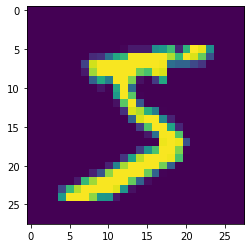

In [133]:
import tensorflow as tf 
from tensorflow.keras import datasets,layers,optimizers
import matplotlib.pyplot as plt
import numpy as np
import time as time

from tensorflow.keras.callbacks import TensorBoard


#加载
(train_image,train_lable),(test_image,test_label) = datasets.mnist.load_data()
#归一化初始数据:如果要进行GPU加速，需要把np的数据转换成tensor的格式
train_image = train_image/255
test_image = test_image/255

# 将lable标签转换成one_hot的向量
train_lable = tf.keras.utils.to_categorical(train_lable)
test_label = tf.keras.utils.to_categorical(test_label)

plt.imshow(train_image[0])

In [138]:
# 建立一个序列model
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.summary()

# 设置模型的相关超参数
optimizer = optimizers.Adam(0.005)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['acc'])

# 模型执行
history = model.fit(train_image,train_lable,batch_size=512,epochs=15,validation_data=(test_image,test_label))

#

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_32 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_76 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 1s 17

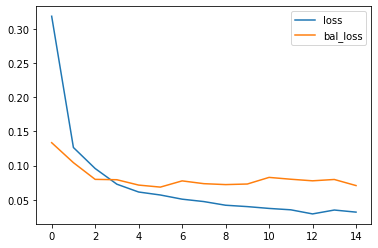

In [127]:
plt.plot(history.epoch,history.history['loss'],label='loss')
plt.plot(history.epoch,history.history['val_loss'],label='bal_loss')
plt.legend()# 显示右上角的指示

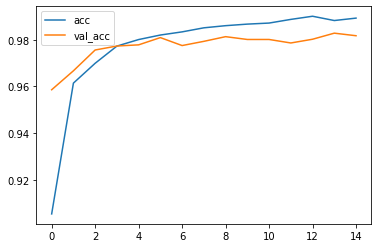

In [128]:
plt.plot(history.epoch,history.history['acc'],label='acc')
plt.plot(history.epoch,history.history['val_acc'],label='val_acc')
plt.legend()

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

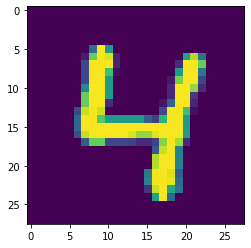

In [100]:
test_index = 56
plt.imshow(test_image[test_index])
test_label[test_index]

In [101]:
model.evaluate(test_image,test_label)
predict = model.predict(test_image)
np.argmax(predict[test_index])

10000/10000 [==============================] - 0s 16us/sample - loss: 0.1331 - acc: 0.9650


4

In [144]:
# TensorBoard的使用
#设定格式化模型名称，以时间戳作为标记
model_name = model.name.format(int(time.time()))
#设定存储位置，每个模型不一样的路径
tensorboard = TensorBoardcallback = tf.keras.callbacks.TensorBoard(
    log_dir='/Users/zhenwuzhou/TensorBoardLogs/tensorboardLogs'.format(model_name),
    histogram_freq=1, batch_size=32,
    write_graph=True, write_grads=False, write_images=True,
    embeddings_freq=0, embeddings_layer_names=None,
    embeddings_metadata=None, embeddings_data=None, update_freq=500
)
#使用它
model.fit(train_image, train_lable, batch_size =32, epochs=10, validation_split=0.1, callbacks=[tensorboard])




Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 47us/sample - loss: 0.0820 - acc: 0.9779 - val_loss: 0.0891 - val_acc: 0.9787
Epoch 2/10
54000/54000 [==============================] - 3s 47us/sample - loss: 0.0817 - acc: 0.9790 - val_loss: 0.0843 - val_acc: 0.9818
Epoch 3/10
54000/54000 [==============================] - 3s 47us/sample - loss: 0.0792 - acc: 0.9801 - val_loss: 0.1033 - val_acc: 0.9778
Epoch 4/10
54000/54000 [==============================] - 3s 47us/sample - loss: 0.0859 - acc: 0.9791 - val_loss: 0.0914 - val_acc: 0.9790
Epoch 5/10
54000/54000 [==============================] - 3s 47us/sample - loss: 0.0712 - acc: 0.9822 - val_loss: 0.0911 - val_acc: 0.9798
Epoch 6/10
54000/54000 [==============================] - 3s 47us/sample - loss: 0.0757 - acc: 0.9816 - val_loss: 0.0931 - val_acc: 0.9832
Epoch 7/10
54000/54000 [==============================] - 3s 47us/sample - loss: 0.0727 - acc: 0.9820 - val_loss: 0.1